# **Problem Statement:** The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

**Step 1:** Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


**Step 2:** Load the Dataset

In [3]:
df = pd.read_csv('/content/car data Price Project 3 predection Dataset.csv')
df.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
98,corolla altis,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0


**Step 3:** Understand the Dataset

Always do basic exploration.

In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Check missing values:

In [5]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


**Step 4:** Data Cleaning

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

Encode categorical columns

In [7]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


**Step 5:** Feature Selection

Separate input features (X) and target (y)

In [8]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


**Step 6:** Train-Test Split

We split data to test model performance.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Step 7:** Train the Model

**Model 1:** Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


Evaluate:

In [11]:
print("Linear Regression Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
Mean Absolute Error: 1.2147329896540084
Mean Squared Error: 3.537020423742584
R2 Score: 0.8464540623821766


**Model 2:** Random Forest Regressor

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


Evaluate:

In [13]:
print("Random Forest Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Performance:
Mean Absolute Error: 0.589304918032787
Mean Squared Error: 0.782636952131147
R2 Score: 0.9660248711535068


**Step 8:** Compare Actual vs Predicted Prices

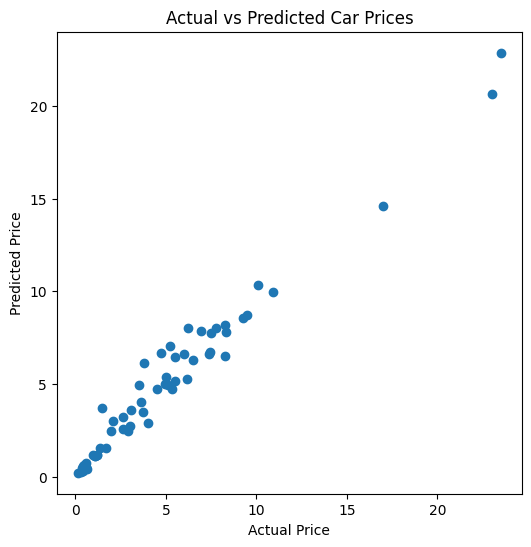

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


**Step 9:** Predict Price of a New Car

Sample Input:

In [31]:
print("Expected features for prediction (in order):")
print(X.columns)

# Construct sample_input with 8 features, ensuring correct order and encoded values
# Example values:
# Car_Name (encoded): e.g., 50 (an arbitrary encoded value for a car name)
# Year: e.g., 2020
# Present_Price: e.g., 10.0 (in lakhs)
# Driven_kms: e.g., 10000
# Fuel_Type (encoded): 2 (for Petrol, based on previous encoding inference)
# Selling_type (encoded): 0 (for Dealer, based on previous encoding inference)
# Transmission (encoded): 1 (for Manual, based on previous encoding inference)
# Owner: 0 (for 1st owner)

sample_input = np.array([[50, 2020, 100000.0, 100000, 2, 0, 1, 0]])
sample_input = sample_input.reshape(1, -1)

predicted_price = rf.predict(sample_input)
print("\nPredicted Car Price:", predicted_price[0])

Expected features for prediction (in order):
Index(['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

Predicted Car Price: 26.660500000000003


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
